<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB
None
../scr

,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Publisher,,,,,
Electronic Arts,868.55,465.45,289.24,10.85,102.92
Nintendo,849.49,371.36,242.11,173.80,62.41
Activision,535.74,306.82,166.54,5.31,57.01
Sony Computer Entertainment,388.10,176.87,117.53,39.92,53.78
Take-Two Interactive,350.17,187.82,106.24,5.56,50.55
Ubisoft,340.23,174.92,121.28,6.41,37.59
Konami Digital Entertainment,137.87,51.23,45.21,21.76,19.59
THQ,162.87,93.97,47.25,2.51,19.11
Microsoft Game Studios,216.49,138.90,58.16,2.83,16.61


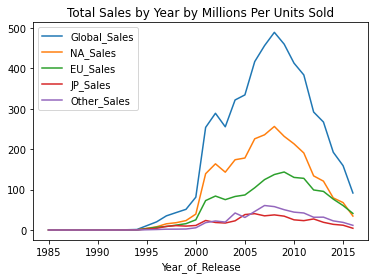

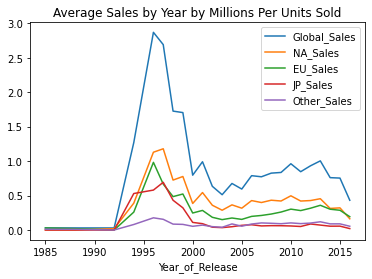

In [51]:
import sys
sys.path.insert(1, '../scripts')
import project_functions
import pandas as pd

dataclean = project_functions.load_and_process()
dataclean.head()


# __EDA TOPICS__
# ***
#- The correlation of years and game sales
#- The correlation between older generation games and newer games
#- The companies which has the most sales?



#_The Correlation of years and games_
dataYearsGameGlobal = dataclean[["Global_Sales","Year_of_Release", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]
dataYearsGameGlobalSum = dataYearsGameGlobal.groupby(['Year_of_Release']).sum()
dataYearsGameGlobalSum.head(10)

dataYearsGameGlobalSum.plot.line(title = "Total Sales by Year by Millions Per Units Sold")

dataYearsGameGlobalMean = dataYearsGameGlobal.groupby(['Year_of_Release']).mean()

dataYearsGameGlobalMean.head(10)
dataYearsGameGlobalMean.plot.line(title = "Average Sales by Year by Millions Per Units Sold")




#_The Correlation between older generation games and newer games
#dataYears1990_1995 =  dataYears1990_1995[(dataYearsGameGlobalSum['Year_of_Release']>1990) & (dataYearsGameGlobalSum['Year_of_Release'>1995])]
#dataYears1990_1995.head(10)













#_The Companies which have the most sales_
dataCompanies = dataclean[["Global_Sales", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales","Publisher"]]
dataCompanies = dataCompanies.groupby(['Publisher']).sum()
#dataCompanies.sort_values(by='Global_Sales', ascending=False).head(10)

dataCompanies.sort_values(by='Global_Sales', ascending=False).head(10)
print("The publisher with the Highest Global Sales are ")
for i in range

dataCompanies.sort_values(by='JP_Sales', ascending=False).head(10)

dataCompanies.sort_values(by='NA_Sales', ascending=False).head(10)

dataCompanies.sort_values(by='EU_Sales', ascending=False).head(10)



dataCompanies.sort_values(by='Other_Sales', ascending=False).head(10)

def 





#theres a difference of companies depening on the region example

